## Grouping engagement by thread

In [206]:
import pandas as pd

datas = pd.read_csv('data/five_ten.csv', encoding='ISO-8859-1')
# datas.rename(columns={'favorite_count': 'likes', 'retweet_count':'retweets', 'reply_count':'replies', 'thread_id':'thread_number'}, inplace=True)
# d = datas[['id', 'thread_number', 'timestamp', 'text', 'retweets', 'likes', 'replies']]
# d.to_csv('data/ten_fifteen.csv', index=False)
datas.head()

,id,thread_number,timestamp,text,retweets,likes,replies
0,999307110902050818,Thread 1,1527088356,Extraordinary evidence at Treasury committee f...,66,59,5
1,999307395712143360,Thread 1,1527088424,The Brexiter favourite Max Fac - would cost bu...,83,107,10
2,999307826265812992,Thread 1,1527088526,How does he arrive at the figure\r\r\n\r\r\n20...,6,11,2
3,999308153346052102,Thread 1,1527088604,Theresa May's New Customs Partnership is much ...,7,10,1
4,999308653894230022,Thread 1,1527088724,Mr Thompson said he did not expect the EU to r...,17,12,2


In [207]:
grouped_by_thread = datas.groupby(['thread_number'])

retweets = {}
favs = {}
replies = {}

# retweets
for thread, data in dict(list(grouped_by_thread)).items():
    retweets[thread] = list(data['retweets'])

retweets_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in retweets.items() ]))

# favs
for thread, data in dict(list(grouped_by_thread)).items():
    favs[thread] = list(data['likes'])

favs_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in favs.items() ]))

# replies
for thread, data in dict(list(grouped_by_thread)).items():
    replies[thread] = list(data['replies'])

replies_by_thread = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in replies.items() ]))

retweets_by_thread.head()

,Thread 1,Thread 10,Thread 100,Thread 101,Thread 11,Thread 12,Thread 13,Thread 14,Thread 15,Thread 16,...,Thread 90,Thread 91,Thread 92,Thread 93,Thread 94,Thread 95,Thread 96,Thread 97,Thread 98,Thread 99
0,66.0,60.0,281.0,80.0,65,281.0,482.0,89.0,50.0,252.0,...,96.0,78.0,145.0,309.0,1082.0,27,399.0,148.0,1317,773.0
1,83.0,8.0,32.0,25.0,18,35.0,41.0,24.0,13.0,318.0,...,35.0,14.0,24.0,33.0,270.0,4,377.0,27.0,224,125.0
2,6.0,4.0,33.0,33.0,18,32.0,19.0,16.0,24.0,399.0,...,32.0,10.0,39.0,29.0,139.0,5,99.0,281.0,181,83.0
3,7.0,4.0,54.0,36.0,20,22.0,65.0,26.0,22.0,124.0,...,104.0,18.0,99.0,29.0,126.0,4,145.0,28.0,143,93.0
4,17.0,4.0,50.0,21.0,17,16.0,59.0,26.0,16.0,135.0,...,44.0,1.0,25.0,46.0,251.0,4,203.0,26.0,289,95.0


## Average size of a thread

In [208]:
grouped_by_thread.size().mean()

7.98019801980198

## Visualizing average retweets in Twitter threads

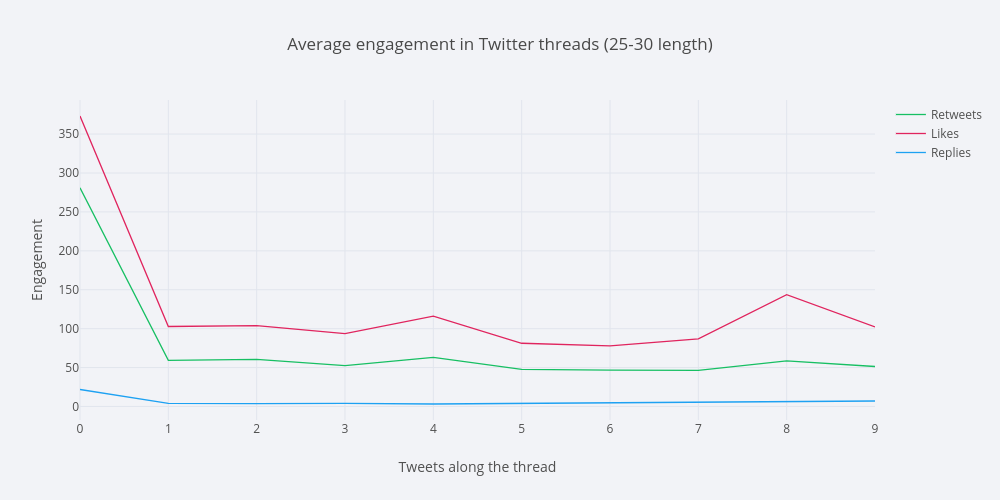

In [209]:
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

avg = pd.DataFrame()
avg['Retweets'] = retweets_by_thread.mean(axis=1)
avg['Likes'] = favs_by_thread.mean(axis=1)
avg['Replies'] = replies_by_thread.mean(axis=1)

fig = avg.iplot(kind='lines', asImage=True, title='Average engagement in Twitter threads (25-30 length)', 
                xTitle='Tweets along the thread', yTitle='Engagement',
                theme='polar', colors={'Retweets': '17bf63', 'Likes': 'e0245e', 'Replies': '1da1f2'})
